<a href="https://colab.research.google.com/github/PsorTheDoctor/Sekcja-SI/blob/master/neural_networks/CNN/sigmoid_vs_tanh_lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LeNet: Sigmoid vs tanh vs relu on MNIST

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train_unipolar), (X_test, y_test_unipolar) = load_data()

11501568/11490434 [==============================] - 0s 0us/step


##Prepare unipolar dataset

In [3]:
X_train_unipolar = X_train / 255
X_test_unipolar = X_test / 255

print(np.amin(X_train_unipolar))
print(np.amax(X_test_unipolar))
print(np.amin(y_train_unipolar))
print(np.amax(y_test_unipolar))

0.0
1.0
0
9


In [19]:
y_train_unipolar

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

##Standard "unipolar" LeNet with sigmoid

In [4]:
def LeNet(activation):
  model = Sequential()
  model.add(Conv2D(6, (5, 5), activation=activation, input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(16, (5, 5), activation=activation, padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(120, activation=activation))
  model.add(Dense(84, activation=activation))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

model = LeNet('sigmoid')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 120)               6

In [5]:
history_sigmoid = model.fit(X_train_unipolar, y_train_unipolar, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 3ms/step - loss: 0.7698 - accuracy: 0.7465
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1406 - accuracy: 0.9573
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0890 - accuracy: 0.9722
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0671 - accuracy: 0.9788
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0563 - accuracy: 0.9828
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0463 - accuracy: 0.9855
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0401 - accuracy: 0.9875
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0351 - accuracy: 0.9890
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0306 - accuracy: 0.9907
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.02

##"Unipolar" LeNet with ReLu

In [6]:
model = LeNet('relu')
history_relu = model.fit(X_train_unipolar, y_train_unipolar, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1698 - accuracy: 0.9475
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0565 - accuracy: 0.9826
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0414 - accuracy: 0.9875
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0326 - accuracy: 0.9896
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0262 - accuracy: 0.9916
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0211 - accuracy: 0.9931
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0175 - accuracy: 0.9942
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0157 - accuracy: 0.9948
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0132 - accuracy: 0.9955
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.011

##Prepare "Bipolar" dataset

In [8]:
X_train_bipolar = X_train / 127.5 - 1
X_test_bipolar = X_test / 127.5 - 1

print(np.amin(X_train_bipolar))
print(np.amax(X_train_bipolar))

-1.0
1.0


##"Bipolar" LeNet with tanh

In [10]:
model = LeNet('tanh')
history_tanh = model.fit(X_train_bipolar, y_train_unipolar, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1500 - accuracy: 0.9555
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0535 - accuracy: 0.9833
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0359 - accuracy: 0.9890
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0274 - accuracy: 0.9911
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0214 - accuracy: 0.9929
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0194 - accuracy: 0.9937
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0158 - accuracy: 0.9951
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0110 - accuracy: 0.9962
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0128 - accuracy: 0.9959
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.010

##Comparision

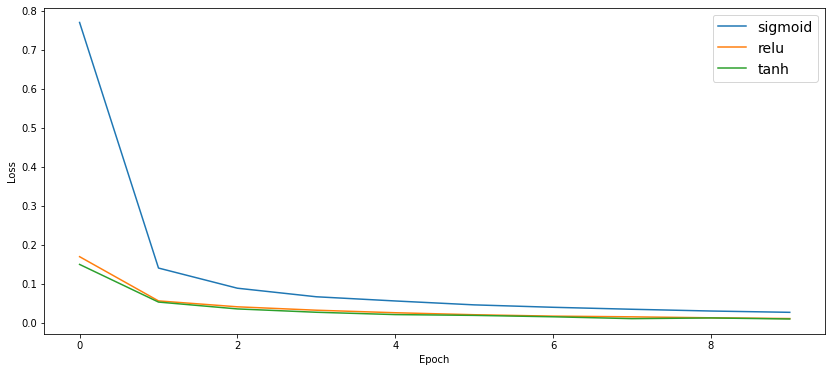

In [17]:
plt.figure(figsize=(14, 6))
plt.plot(history_sigmoid.history['loss'], label='sigmoid')
plt.plot(history_relu.history['loss'], label='relu')
plt.plot(history_tanh.history['loss'], label='tanh')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(fontsize=14)

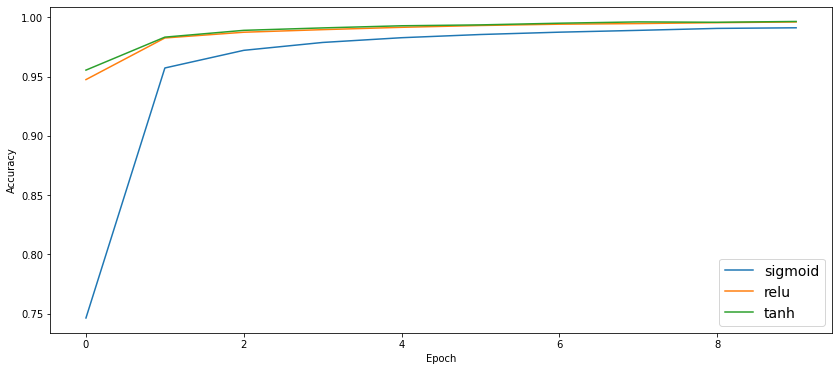

In [18]:
plt.figure(figsize=(14, 6))
plt.plot(history_sigmoid.history['accuracy'], label='sigmoid')
plt.plot(history_relu.history['accuracy'], label='relu')
plt.plot(history_tanh.history['accuracy'], label='tanh')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(fontsize=14)

##Bonus: stardard LeNet on labels in (0, 1) range

###**Lesson learned: y labels must be NON-NEGATIVE !!**

In [28]:
y_train = y_train_unipolar / 9
y_test = y_test_unipolar / 9

print(np.amin(y_train))
print(np.amax(y_train))

0.0
1.0


In [30]:
model = LeNet('sigmoid')
history_01 = model.fit(X_train_unipolar, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3302 - accuracy: 0.0987
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1545 - accuracy: 0.1548
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0372 - accuracy: 0.1903
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0265 - accuracy: 0.1928
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0215 - accuracy: 0.1936
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0185 - accuracy: 0.1944
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0159 - accuracy: 0.1949
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0152 - accuracy: 0.1950
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0128 - accuracy: 0.1953
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.011

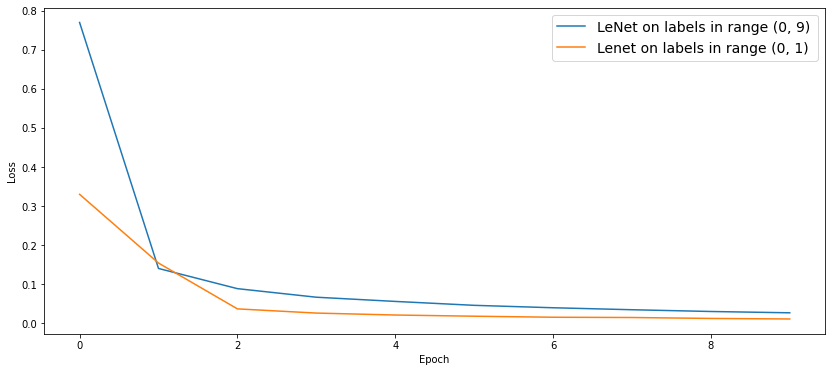

In [33]:
plt.figure(figsize=(14, 6))
plt.plot(history_sigmoid.history['loss'], label='LeNet on labels in range (0, 9)')
plt.plot(history_01.history['loss'], label='Lenet on labels in range (0, 1) ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(fontsize=14)

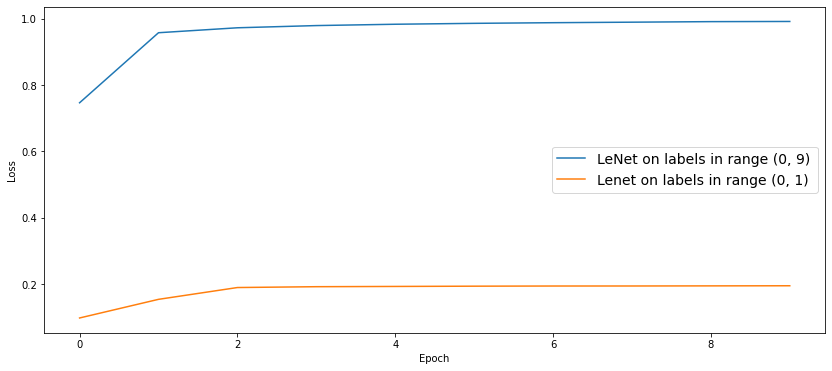

In [34]:
plt.figure(figsize=(14, 6))
plt.plot(history_sigmoid.history['accuracy'], label='LeNet on labels in range (0, 9)')
plt.plot(history_01.history['accuracy'], label='Lenet on labels in range (0, 1) ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(fontsize=14)